In [4]:
# Thư viện
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
# Đọc dữ liệu
df = pd.read_csv(r"/content/drive/MyDrive/BTL/file.csv")
df.sample(5)

FileNotFoundError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Xóa các dữ liệu không cần thiết
columns_to_drop = ['Unnamed: 0', 'CustomerID', 'Transaction_ID', 'Product_Description', 'Coupon_Code','Product_SKU']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.to_csv('file.csv', index=False)

In [ ]:
df.mean(numeric_only=True)

Tenure_Months         26.127995
Quantity               4.497638
Avg_Price             52.237646
Delivery_Charges      10.517630
GST                    0.137462
Offline_Spend       2830.914141
Online_Spend        1893.109119
Month                  6.652800
Discount_pct          19.953382
dtype: float64

In [ ]:
# Thay thế giá trị thiếu bằng mode cho từng cột
df = df.apply(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
df.dropna(thresh=5,inplace=True)
df.dropna(subset=['Discount_pct'], inplace=True)

In [ ]:
# Lựa chọn các cột có giá trị số cần chuẩn hóa
numerical_columns = ['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend', 'Discount_pct']

# Tạo một StandardScaler và fit nó trên dữ liệu
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
# Lựa chọn các cột có dữ liệu chữ cần chuyển đổi
categorical_columns = ['Gender', 'Location', 'Product_Category','Coupon_Status']

# Tạo một LabelEncoder và fit nó trên dữ liệu
label_encoder = LabelEncoder()

# Áp dụng Label Encoding cho từng cột có dữ liệu chữ
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.to_csv('file.csv', index=False)

In [ ]:
df.head()

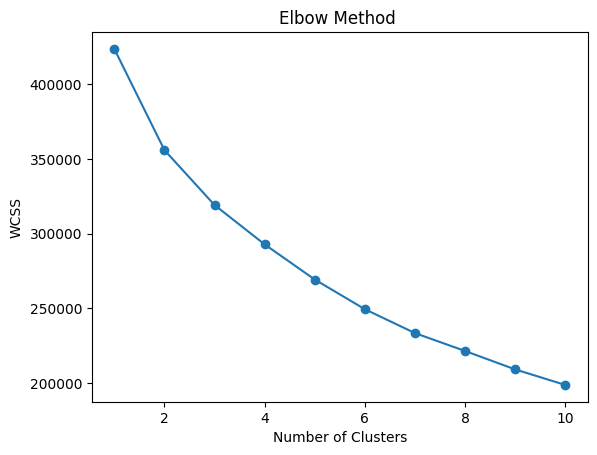

In [ ]:
# Lựa chọn các cột cần phân cụm
features = ['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend', 'Discount_pct']

# Tạo một DataFrame mới chứa dữ liệu cần thiết
data_for_clustering = df[features]

# Khởi tạo một loạt số lượng cụm để thử nghiệm (từ 1 đến 10, có thể điều chỉnh)
num_clusters_to_try = range(1, 11)
inertia_values = []

# Thực hiện KMeans với số lượng cụm thay đổi
for num_clusters in num_clusters_to_try:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Set giá trị n_init một cách rõ ràng
    kmeans.fit(data_for_clustering)
    inertia_values.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.plot(num_clusters_to_try, inertia_values, marker='o')
plt.title('Elbow Method ')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Bước 2: Hàm tính toán khoảng cách từ một điểm đến các tâm cụm
def calculate_distances(X, centers):
    distances = pairwise_distances_argmin_min(X, centers)[1]
    return distances

In [ ]:
# Bước 3: Khởi tạo ngẫu nhiên 3 tâm cụm ban đầu
def initialize_centers(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    centers = X[indices]
    return centers

In [ ]:
# Bước 4: Vòng lặp chính của thuật toán K-means
def kmeans(X, k, max_iters=100, tol=1e-4):
    centers = initialize_centers(X, k)
    prev_centers = np.zeros_like(centers)
    iterations = 0

    while (iterations < max_iters) and (np.linalg.norm(centers - prev_centers) > tol):
        distances = calculate_distances(X, centers)
        labels = np.argmin(distances, axis=1)

        prev_centers = np.copy(centers)

        for i in range(k):
            if len(X[labels == i]) > 0:
                centers[i] = np.mean(X[labels == i], axis=0)

        iterations += 1

    return centers, labels, iterations

In [ ]:
# Bước 5: In ra chi tiết các kết quả
def print_results(initial_centers, final_centers, num_iterations, labels):
    print("Ba tâm cụm ban đầu:")
    print(initial_centers)
    print("\nSố lần lặp:", num_iterations)
    print("\nBa tâm cụm cuối cùng:")
    print(final_centers)
    print("\nSố lượng điểm dữ liệu trong mỗi cụm:")
    print(pd.Series(labels).value_counts())